# packages

In [593]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

# imports

In [594]:
import pandas as pd
import numpy as np
import json
import csv
import os

# Reading

In [595]:
df = pd.read_csv(filepath_or_buffer="data/extraction consolidation results_V0_1.csv",sep="|")

In [596]:
result = df['Title'].to_list()

In [597]:
result = list(dict.fromkeys(result))
print(len(result))

30


In [598]:
result

['A framework for Model-Driven Engineering of resilient software-controlled systems',
 'A Methodology for Digital Twin Modeling and Deployment for Industry 4.0',
 'A Novel Methodology to Construct Digital Twin Models for Spacecraft Operations Using Fault and Behaviour Trees',
 'AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins with AutomationML',
 'Case Study on Automated and Continuous Reliability Assessment of Software-Defined Manufacturing Based on Digital Twins',
 'Combining Low-Code Programming and SDL-Based Modeling with Snap! in the Industry 4.0 Context',
 'CPSAML: A Language and Code Generation Framework for Digital Twin Based Monitoring of Mobile Cyber-Physical Systems',
 'Interface Development for Digital Twin of an Electric Motor Based on Empirical Performance Model',
 'Digital Twins Driving Model Based on Petri Net in Industrial Pipeline',
 'Enabling Semantic Interoperability of Asset Administration Shells through an Ontology-Based Modeling Metho

In [599]:
titles = list(df.columns)

In [600]:
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")

In [601]:
data = df.merge(metadata, how='left', on='Title')

In [602]:
del metadata
del df
del titles

In [603]:
data.columns

Index(['Title', 'DT Definition', 'modeling language',
       'note on modeling language', 'model type', 'model processing technique',
       'model usage technique', 'source', 'target',
       'purpose of MDE application', 'purpose of DT', 'use case domain',
       'system lifecycle phase', 'twinning target', 'twin lifecycle phase',
       'purpose /expected benefit of using models', 'open challenges',
       'Technological Readiness Level', 'notes', 'Use Case',
       'Publication Title', 'Authors', 'Publication Year',
       'Document Identifier', 'Publisher'],
      dtype='object')

# Formatting Data

In [604]:
out_menge_1 = {}
for key in result:
    out_menge_1[key] = {'DT_Definition':None,'data':{}, 'open challenges':None, 'Technological Readiness Level':None, 'notes':None, 'Use Case':None, 'twinning target': None}

In [605]:
data.reset_index()
for title in result:
    rownum = 0
    for index, row in data.iterrows():
        if title == row['Title'] and not pd.isna(title):
            print(index,title, row['modeling language'])
            rowcopy = row.__deepcopy__()
            
            if row['DT Definition'] is not None and not pd.isna(row['DT Definition']):
                out_menge_1[title]['DT_Definition'] = row['DT Definition']

            if row['purpose of MDE application'] is not None and not pd.isna(row['purpose of MDE application']):
                out_menge_1[title]['purpose of MDE application'] = row['purpose of MDE application']

            if row['purpose of DT'] is not None and not pd.isna(row['purpose of DT']):
                out_menge_1[title]['purpose of DT'] = row['purpose of DT']

            if row['use case domain'] is not None and not pd.isna(row['use case domain']):
                out_menge_1[title]['use case domain'] = row['use case domain']
            
            if row['twinning target'] is not None and not pd.isna(row['twinning target']):
                if out_menge_1[title]['twinning target'] is None:
                    out_menge_1[title]['twinning target'] = row['twinning target']
                else:
                    out_menge_1[title]['twinning target'] += "; "
                    out_menge_1[title]['twinning target'] +=  row['twinning target']

            if row['purpose /expected benefit of using models'] is not None and not pd.isna(row['purpose /expected benefit of using models']):
                out_menge_1[title]['purpose /expected benefit of using models'] = row['purpose /expected benefit of using models']

            if row['open challenges'] is not None and not pd.isna(row['open challenges']):
                out_menge_1[title]['open challenges'] = row['open challenges']

            if row['Technological Readiness Level'] is not None and not pd.isna(row['Technological Readiness Level']):
                out_menge_1[title]['Technological Readiness Level'] = row['Technological Readiness Level']
            
            if row['notes'] is not None and not pd.isna(row['notes']):
                out_menge_1[title]['notes'] = row['notes']

            if row['Use Case'] is not None and not pd.isna(row['Use Case']):
                out_menge_1[title]['Use Case'] = row['Use Case']

            if row['Publication Title'] is not None and not pd.isna(row['Publication Title']):
                out_menge_1[title]['Publication Title'] = row['Publication Title']
            
            if row['Authors'] is not None and not pd.isna(row['Authors']):
                out_menge_1[title]['Authors'] = row['Authors']
            
            if row['Publication Year'] is not None and not pd.isna(row['Publication Year']):
                out_menge_1[title]['Publication Year'] = row['Publication Year']

            if row['Document Identifier'] is not None and not pd.isna(row['Document Identifier']):
                out_menge_1[title]['Document Identifier'] = row['Document Identifier']

            if row['Publisher'] is not None and not pd.isna(row['Publisher']):
                out_menge_1[title]['Publisher'] = row['Publisher']

            # multiple Trafos
            rowjson = rowcopy.drop(row.iloc[[0,1,9,10,11,13,15,16,17,18,19,20,21,22,23,24]].index).to_json()
            out_menge_1[title]['data'][rownum] = rowjson
            #out_menge_1[title]['data'][rownum].append(rowjson)
            rownum+=1


0 A framework for Model-Driven Engineering of resilient software-controlled systems SysML BDD
1 A framework for Model-Driven Engineering of resilient software-controlled systems Knowledge base model
2 A Methodology for Digital Twin Modeling and Deployment for Industry 4.0 AutomationML
3 A Methodology for Digital Twin Modeling and Deployment for Industry 4.0 AutomationML
4 A Methodology for Digital Twin Modeling and Deployment for Industry 4.0 AutomationML
5 A Methodology for Digital Twin Modeling and Deployment for Industry 4.0 AutomationML
6 A Novel Methodology to Construct Digital Twin Models for Spacecraft Operations Using Fault and Behaviour Trees Fault Tree
7 A Novel Methodology to Construct Digital Twin Models for Spacecraft Operations Using Fault and Behaviour Trees ODM Models
8 A Novel Methodology to Construct Digital Twin Models for Spacecraft Operations Using Fault and Behaviour Trees AutomationML
9 AML4DT: A Model-Driven Framework for Developing and Maintaining Digital Twins

In [552]:
out_menge_1

{'A framework for Model-Driven Engineering of resilient software-controlled systems': {'DT_Definition': 'dynamic virtual model of a system, processor, or service, with data (e.g., sensor data) from physical systems or processes integrated into it.; "Software digital twins representations provide a key abstraction, providing an agile interface on hardware components, capturing operational behaviours of physical assets and processes, also providing refined and interpreted data, to enable diagnoses, predic\x02tive maintenance tasks, process plannings, process optimizations, virtual prototyping, and simulation."',
  'data': {0: '{"modeling language":"SysML BDD","note on modeling language":null,"model type":"structure","model processing technique":"Model to Model Transformation","model usage technique":null,"source":"SysML BDD","target":"Knowledge Base of software digital twins (Metamodel proposed in Figure 5 of the paper) -> in fact, this is the class diagram of their knowledge base","syst

In [553]:
del rowjson
del rowcopy
del result
del rownum

In [554]:
try:
    os.mkdir('target/')
    os.mkdir('target/img/')
except OSError as error:
    print(error)

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'target/'


# Data analysis

## Year counter

In [555]:
year2020 = 0
year2021 = 0
year2022 = 0
year2023 = 0

In [556]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    if out_menge_1[key]['Publication Year'] == 2020:
        year2020+=1
    if out_menge_1[key]['Publication Year'] == 2021:
        year2021+=1
    if out_menge_1[key]['Publication Year'] == 2022:
        year2022+=1
    if out_menge_1[key]['Publication Year'] == 2023:
        year2023+=1

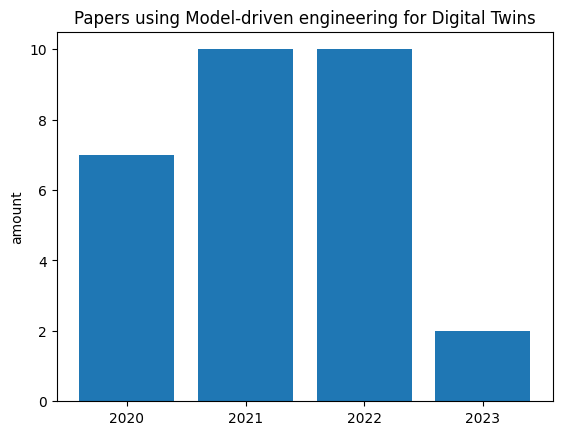

In [557]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['2020', '2021', '2022', '2023']
counts = [year2020, year2021, year2022, year2023]
bar_labels = [2020,2021,2022,2023]
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('Papers using Model-driven engineering for Digital Twins')

plt.savefig('target/img/years.png')

plt.show()

In [558]:
del year2020 
del year2021 
del year2022 
del year2023 
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

## system life cycle

In [559]:
Design = 0
Implement = 0
Operate = 0
Maintain = 0
NotDefined = 0

In [560]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    for entry in out_menge_1[key]['data']:
        slcp = json.loads(out_menge_1[key]['data'][entry])['system lifecycle phase']
        if slcp is None:
            NotDefined+=1
            continue
        if "Design" in slcp:
            Design+=1
        if "Implement" in slcp:
            Implement+=1
        if "Operate" in slcp:
            Operate+=1
        if "Maintain" in slcp:
            Maintain+=1
        

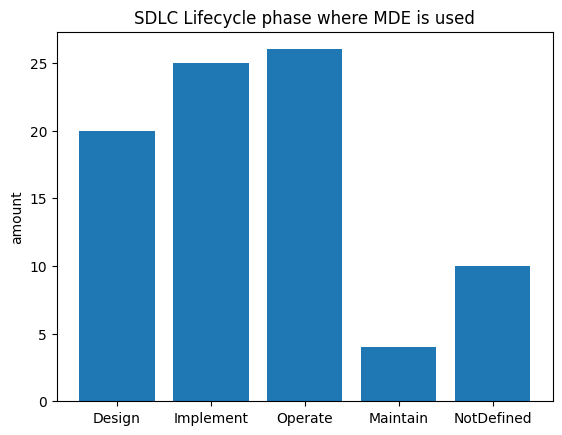

In [561]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Design', 'Implement', 'Operate', 'Maintain', 'NotDefined']
counts = [Design, Implement, Operate, Maintain, NotDefined]
bar_labels = ['Design', 'Implement', 'Operate', 'Maintain', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('SDLC Lifecycle phase where MDE is used')

plt.savefig('target/img/Lifecycle_phase.png')

#savefig(fname, *, dpi='figure', format=None, metadata=None,
#        bbox_inches=None, pad_inches=0.1,
#        facecolor='auto', edgecolor='auto',
#        backend=None, **kwargs
#       )
plt.show()

In [562]:
del Design 
del Implement 
del Operate 
del Maintain 
del NotDefined 
del slcp
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

## DT Definition

## DT

### twinning target

In [563]:
individual = 0
sys_of_sys = 0
bio = 0
product = 0
process = 0
other = 0
NotDefined = 0

In [564]:
categories = ['Individual Systems, such as automated cars (Atorf and Roßmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).',
              'Systems of Systems, such as complete factories (Biesinger et al., 2018), oil wells (Kosenkov et al., 2018), or railway systems (Vatn, 2018).',
              'Biological Beings, such as factory employees (Graessler and Poehler, 2018), fishes (Joordens and Jamshidi, 2018), or sports players (Balachandar and Chinnaiyan, 2019).',
              'Products, such as reinforced plastics (Wang et al., 2018), sunroof ring frames (Wärmefjord et al., 2017), or wearable masks (Zheng et al., 2018).',
              'Processes, e.g., business processes (Rambow-Hoeschele et al., 2018), medical processes (Karakra et al., 2018), or recycling processes (Popa et al., 2018).',
              'Other counterparts, e.g., arbitrary physical bodies (El Saddik, 2018) or unspecified manufacturing resources (Lu and Xu, 2018b).']

In [565]:
for key in out_menge_1:
    if pd.isna(key):
        continue

    if categories[0] in out_menge_1[key]['twinning target']:
            individual+=1
    if categories[1] in out_menge_1[key]['twinning target']:
            sys_of_sys+=1
    if categories[2] in out_menge_1[key]['twinning target']:
            bio+=1
    if categories[3] in out_menge_1[key]['twinning target']:
            product+=1
    if categories[4] in out_menge_1[key]['twinning target']:
            process+=1
    if categories[5] in out_menge_1[key]['twinning target']:
            other+=1
    print(out_menge_1[key]['twinning target'])
    if out_menge_1[key]['twinning target'] is None:
        NotDefined+=1

Individual Systems, such as automated cars (Atorf and Roßmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).
Individual Systems, such as automated cars (Atorf and RoÃŸmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).; Individual Systems, such as automated cars (Atorf and RoÃŸmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).; Systems of Systems, such as complete factories (Biesinger et al., 2018), oil wells (Kosenkov et al., 2018), or railway systems (Vatn, 2018).; Systems of Systems, such as complete factories (Biesinger et al., 2018), oil wells (Kosenkov et al., 2018), or railway systems (Vatn, 2018).
Individual Systems, such as automated cars (Atorf and RoÃŸmann, 2018), gas turbines (Dawes et al., 2019), or manufacturing machines (Debroy et al., 2017).
Individual Systems, such as automated cars (Atorf and RoÃŸmann, 2018), gas turbines (Dawes et al

TypeError: argument of type 'NoneType' is not iterable

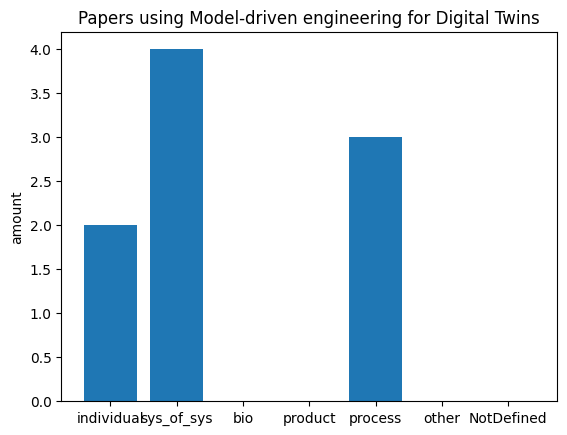

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['individual', 'sys_of_sys', 'bio', 'product', 'process', 'other', 'NotDefined']
counts = [individual, sys_of_sys, bio, product, process, other, NotDefined]
bar_labels = ['individual', 'sys_of_sys', 'biological', 'product', 'process', 'other', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('Papers using Model-driven engineering for Digital Twins')

plt.savefig('target/img/twinningtarget.png')

plt.show()

In [ ]:
del individual 
del sys_of_sys 
del bio 
del product 
del process 
del other
del categories
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

### twin life cycle phase

### use case domain

### Technological Readiness

### modeling language

## MDE

### model type

In [ ]:
structure = 0
behavior = 0
physics = 0
rule = 0
geometry = 0
NotDefined = 0

In [ ]:
for key in out_menge_1:
    if pd.isna(key):
        continue
    for entry in out_menge_1[key]['data']:
        slcp = json.loads(out_menge_1[key]['data'][entry])['model type']
        if slcp is None:
            NotDefined+=1
            continue
        if "structure" in slcp:
            structure+=1
        if "behavior" in slcp:
            behavior+=1
        if "physics" in slcp:
            physics+=1
        if "rule" in slcp:
            rule+=1
        if "geometry" in slcp:
            geometry+=1

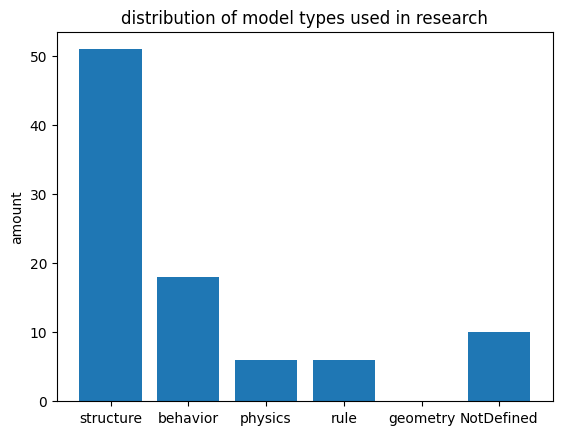

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['structure', 'behavior', 'physics', 'rule', 'geometry', 'NotDefined']
counts = [structure, behavior, physics, rule, geometry, NotDefined]
bar_labels = ['structure', 'behavior', 'physics', 'rule', 'geometry', 'NotDefined']
bar_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('amount')
ax.set_title('distribution of model types used in research')

plt.savefig('target/img/modelTypes.png')

plt.show()

In [ ]:
del structure
del behavior
del physics
del rule
del geometry
del NotDefined 
del slcp
del ax 
del fruits
del counts
del bar_colors
del bar_labels
del fig

### model processing technique + from&to

### purpose of MDE technique

### purpose/benefit of using models

## to json

In [ ]:
json_object = json.dumps(out_menge_1, indent = 4) 
print(json_object)

{
    "A framework for Model-Driven Engineering of resilient software-controlled systems": {
        "DT_Definition": "dynamic virtual model of a system, processor, or service, with data (e.g., sensor data) from physical systems or processes integrated into it.; \"Software digital twins representations provide a key abstraction, providing an agile interface on hardware components, capturing operational behaviours of physical assets and processes, also providing refined and interpreted data, to enable diagnoses, predic\u0002tive maintenance tasks, process plannings, process optimizations, virtual prototyping, and simulation.\"",
        "data": {
            "0": "{\"modeling language\":\"SysML BDD\",\"note on modeling language\":null,\"model type\":\"structure\",\"model processing technique\":\"Model to Model Transformation\",\"model usage technique\":null,\"source\":\"SysML BDD\",\"target\":\"Knowledge Base of software digital twins (Metamodel proposed in Figure 5 of the paper) -> in 

In [ ]:
try:
    os.mkdir('target/json/')
except OSError as error:
    print(error)

[WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: 'target/json/'


In [ ]:
with open("target/json/temp.json", "w") as outfile:
    outfile.write(json_object)

## eine runde fegen

In [ ]:
try:
    os.remove("target/json/temp.json")
except OSError as error:
    print(error)

In [ ]:
del json_object
del outfile
del title
del row
del key
del entry
del index